In [1]:
from dataset import get, cheat
test = get()
train = cheat()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

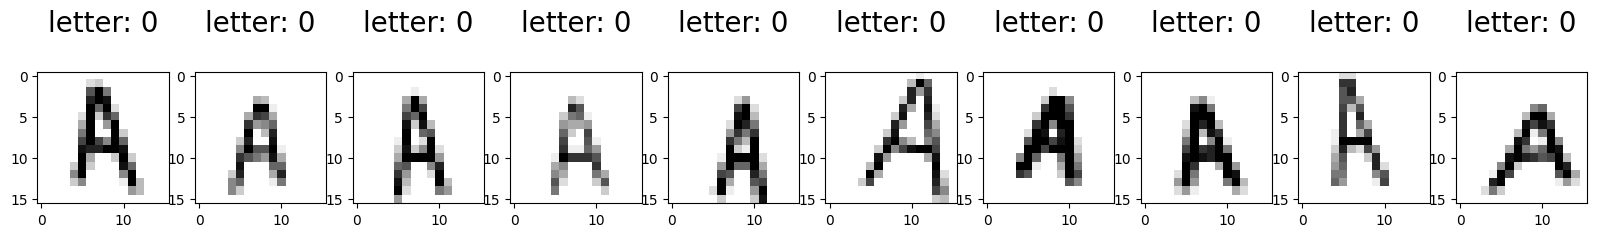

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (16, 16)), cmap=plt.cm.gray)
    plt.title('letter: %i\n' % label, fontsize = 20)

In [4]:
data = [e[0] for e in train]
target = [e[1] for e in train]

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
clf

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [6]:
%%time
clf.fit(data, target)

CPU times: user 22.1 s, sys: 7.76 ms, total: 22.1 s
Wall time: 22.2 s


LogisticRegression(C=50, max_iter=10000, solver='saga')

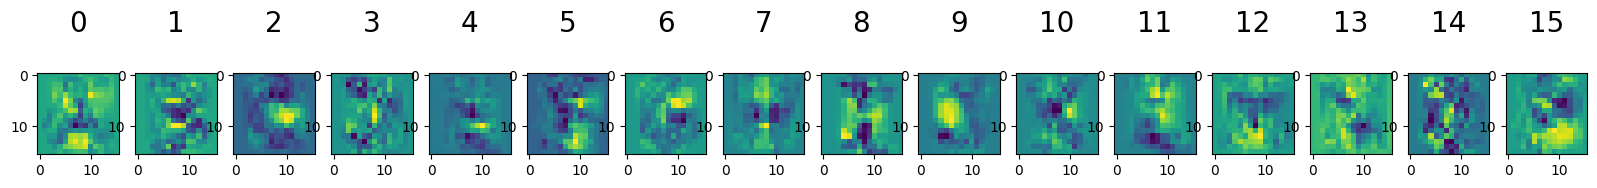

In [7]:
coef = clf.coef_.copy()
plt.figure(figsize=(20,4))
for i, c in enumerate(coef):
    plt.subplot(1, 16, i + 1)
    plt.imshow(c.reshape(16, 16))
    plt.title('%i\n' % i, fontsize = 20)

In [8]:
clf.score(data, target)

1.0

In [9]:
clf.score([e[0] for e in test], [e[1] for e in test])

0.8828125

In [10]:
buckets = {}
for d, l in test:
    if l not in buckets:
        buckets[l] = []
    buckets[l].append(d)


for l in sorted(buckets.keys()):
# for l, ds in buckets.items():
    ds = buckets[l]
    c = "ABCDEFGHIJKLMNOP"[l]
    o = clf.score(ds, [l]*len(ds))
    print(f"{c}: {o:.02}")

A: 0.67
B: 1.0
C: 0.83
D: 1.0
E: 0.85
F: 0.86
G: 0.88
H: 0.86
I: 0.92
J: 1.0
K: 1.0
L: 1.0
M: 0.89
N: 0.9
O: 0.43
P: 0.9


In [11]:
import pickle
with open("weights.pickle", "wb") as f:
    pickle.dump(coef.tolist(), f)